https://chat.openai.com/share/70f87008-d452-484b-b8d2-8d4ba2b95891

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df = pd.read_excel("data/Telco_customer_churn_adapted_v2.xlsx")
columns = ["Tenure Months", "Monthly Purchase (Thou. IDR)", "CLTV (Predicted Thou. IDR)"]
X = df.copy()[columns]

churners = X.loc[df[df["Churn Label"] == "Yes"].index]
non_churners = X.loc[df[df["Churn Label"] == "No"].index]

### Churners Segmentation

In [113]:
scaler = StandardScaler()
churners_scaled = scaler.fit_transform(churners)

k=3
kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
kmeans.fit(churners_scaled)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [114]:
churners["Cluster"] = kmeans.labels_

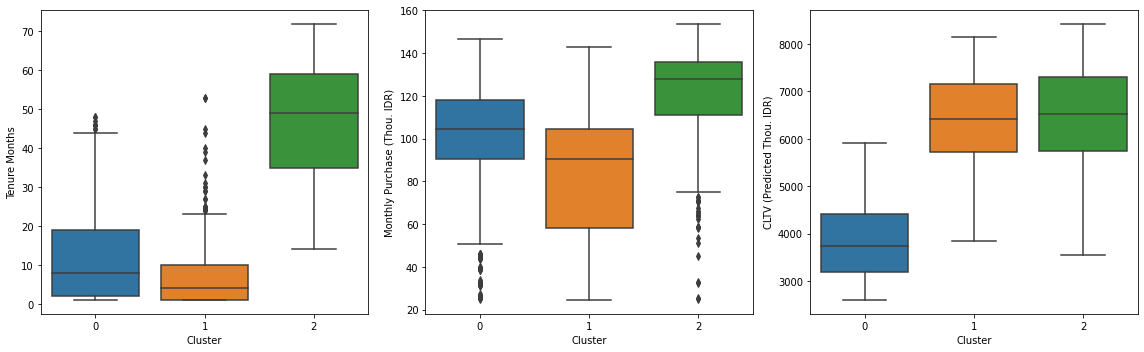

In [115]:
plt.figure(figsize=(16, 5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=churners, x='Cluster', y=churners.columns[i])

plt.tight_layout()
plt.show()

1. Segment Name: "The Swift Attrition"

Characteristics:
- Customers in this cluster have relatively short monthly tenures, with an average of around 12 months.
- Despite their short tenures, they have relatively high monthly expenditures.
- However, their CLTV is much lower compared to customers in other clusters.

Marketing Strategy:
- Focus on customer retention by highlighting the long-term benefits of telco services.
- Customer Education: Provide tutorial content to educate customers on maximizing their service usage and the benefits they may have missed.
- Loyalty Discounts: Offer incentives for them to extend their subscriptions, such as loyalty discounts.
- Community Programs: Engage short-tenure customers to share their experiences with telco services and encourage them to become part of a larger community.

2. Segment Name: "The Moderate Churners"

Characteristics:
- Customers in this cluster have moderate monthly tenures (average of around 6 months).
- Their monthly expenditures are relatively high.
- Despite having a potentially high CLTV, they still tend to churn for various reasons.

Marketing Strategy:
- Focus on customer retention by offering exclusive benefits and a premium experience.
- Loyalty Enhancement: Provide exclusive benefits and premium telco package offers to enhance their overall experience.
- Loyalty Programs: Offer loyalty programs, VIP access, and early access to new telco features to keep them loyal.
- Customer Community: Organize engagement activities to seek feedback on service improvements and show appreciation for their loyalty.

3. Segment Name: "The High-Value Churners"

Characteristics:
- Customers in this cluster have long monthly tenures (average of around 47 months).
- They have high monthly expenditures and a potentially high CLTV.
- However, they still tend to churn for various reasons.

Marketing Strategy:
- Focus on customer retention by emphasizing cost-effective telco service packages and the exploration of new subscription deals.
- Promotional Marketing: Offer telco packages with promotional discounts to encourage sign-ups within a specific time frame.
- Competitive Pricing Emphasis: Highlight competitive pricing between different telco subscriptions and the current one.
- Freebie Marketing: Offer them free trials of new telco service packages to encourage them to explore with confidence and include free gifts when they sign up for a subscription plan.

In [116]:
for i in range(k):
    print("Cluster", i)
    print(churners[churners["Cluster"] == i][columns].describe())
    print()

Cluster 0
       Tenure Months  Monthly Purchase (Thou. IDR)  CLTV (Predicted Thou. IDR)
count     738.000000                    738.000000                  738.000000
mean       12.463415                     99.663936                 3824.189566
std        12.331772                     26.798656                  784.552495
min         1.000000                     25.090000                 2603.900000
25%         2.000000                     90.691250                 3186.300000
50%         8.000000                    104.390000                 3737.500000
75%        19.000000                    118.251250                 4412.200000
max        48.000000                    146.835000                 5918.900000

Cluster 1
       Tenure Months  Monthly Purchase (Thou. IDR)  CLTV (Predicted Thou. IDR)
count     716.000000                    716.000000                  716.000000
mean        6.765363                     79.964888                 6368.267877
std         7.685658           

### Non Churners Segmentation

In [47]:
scaler = StandardScaler()
non_churners_scaled = scaler.fit_transform(non_churners)

k=3
kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
kmeans.fit(non_churners_scaled)

non_churners["Cluster"] = kmeans.labels_

for i in range(k):
    print("Cluster", i)
    print(non_churners[non_churners["Cluster"] == i][columns].describe())
    print()

Cluster 0
       Tenure Months  Monthly Purchase (Thou. IDR)  CLTV (Predicted Thou. IDR)
count     1895.00000                   1895.000000                 1895.000000
mean        57.57942                    115.742121                 6723.176728
std         14.62693                     21.904661                  936.718651
min          2.00000                     54.730000                 4018.300000
25%         51.00000                    100.717500                 5961.800000
50%         62.00000                    117.455000                 6715.800000
75%         70.00000                    134.875000                 7473.700000
max         72.00000                    154.375000                 8450.000000

Cluster 1
       Tenure Months  Monthly Purchase (Thou. IDR)  CLTV (Predicted Thou. IDR)
count    1568.000000                   1568.000000                 1568.000000
mean       33.678571                     43.044343                 6653.360204
std        23.881648           

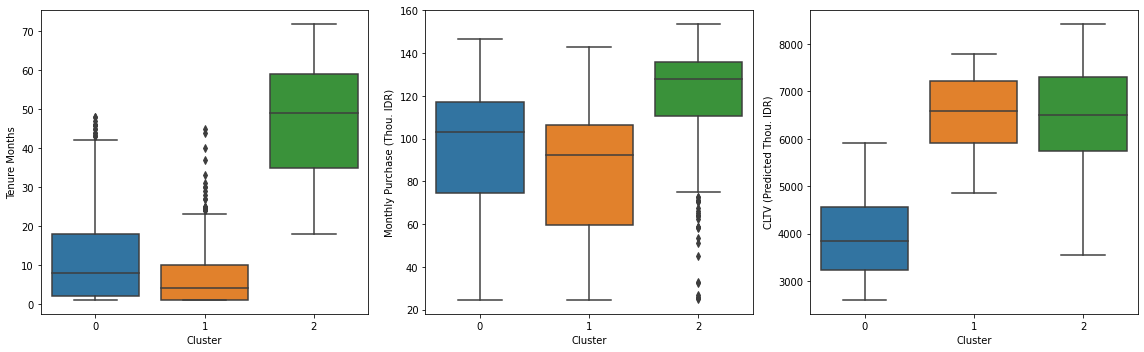

In [46]:
plt.figure(figsize=(16, 5))

for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=churners, x='Cluster', y=churners.columns[i])

plt.tight_layout()
plt.show()

1. Segment Name: "The Loyal Premium Customers"

Characteristics:
- Customers in this cluster have a long average tenure of around 57.58 months.
- They have a relatively high average monthly purchase amount, approximately 115.74 Thousand IDR.
- The predicted CLTV for this group is quite high.

Marketing Strategy:
- Focus on maintaining and enhancing the premium experience for these loyal customers.
- Premium Enhancements: Offer premium features, exclusive content, and top-tier services to maintain their loyalty.
- Loyalty Rewards: Implement a loyalty program with rewards and special privileges for long-standing customers.
- Personalized Engagement: Engage with personalized content and offers to strengthen their loyalty.

2. Segment Name: "The Moderate Loyalty Segment"

Characteristics:
- Customers in this cluster have an average tenure of about 33.68 months.
- Their monthly purchase amounts are moderate, averaging around 43.04 Thousand IDR.
- The predicted CLTV for this group is relatively high.

Marketing Strategy:
- Enhance customer loyalty by offering tailored packages and promotions.
- Tailored Offers: Provide personalized package deals and promotions based on their preferences and history.
- Customer Feedback: Actively seek their feedback to improve the services and offerings.
- Loyalty Programs: Encourage participation in loyalty programs and reward them for their continued patronage.

3. Segment Name: "The Value-Seeking Customers"

Characteristics:
- Customers in this cluster have an average tenure of about 19 months.
- They have relatively lower monthly purchase amounts, averaging around 73.21 Thousand IDR.
- The predicted CLTV for this group is lower compared to the other segments.

Marketing Strategy:
- Focus on offering cost-effective and value-driven services.
- Value Packages: Promote affordable service packages and demonstrate their cost-effectiveness.
- Education on Savings: Educate customers about how they can get more value for their spending.
- Cost Savings: Emphasize the potential savings they can achieve by subscribing to specific packages.

In [68]:
segment_df = pd.read_excel("data/segmentation.xlsx")
segment_df.head()

,Model,Churn Label,Segment,Characteristics,Marketing
0,Value,Yes,The Swift Attrition,- Customers in this cluster have relatively sh...,- Focus on customer retention by highlighting ...
1,Value,Yes,The Moderate Churners,- Customers in this cluster have moderate mont...,- Focus on customer retention by offering excl...
2,Value,Yes,The High-Value Churners,- Customers in this cluster have long monthly ...,- Focus on customer retention by emphasizing c...
3,Value,No,The Loyal Premium Customers,- Customers in this cluster have a long averag...,- Focus on maintaining and enhancing the premi...
4,Value,No,The Moderate Loyalty Segment,- Customers in this cluster have an average te...,- Enhance customer loyalty by offering tailore...


In [67]:
filter = "Yes"
model = "Value-based Segmentation"

model = "Value" if "Value" in model else "Needs"

if filter == "Show All":
    temp = segment_df[segment_df["Model"] == model]
elif filter == "Churners":
    temp = segment_df[(segment_df["Model"] == model) & (segment_df["Churn Label"] == "Yes")]
else:
    temp = segment_df[(segment_df["Model"] == model) & (segment_df["Churn Label"] == "No")]

temp

,Model,Churn Label,Segment,Characteristics,Markteting
3,Value,No,The Loyal Premium Customers,- Customers in this cluster have a long averag...,- Focus on maintaining and enhancing the premi...
4,Value,No,The Moderate Loyalty Segment,- Customers in this cluster have an average te...,- Enhance customer loyalty by offering tailore...
5,Value,No,The Value-Seeking Customers,- Customers in this cluster have an average te...,- Focus on offering cost-effective and value-d...


# Needs-based Segmentation

In [87]:
df = pd.read_excel("data/Telco_customer_churn_adapted_v2.xlsx")
columns = ['Games Product', 'Music Product', 'Education Product', 'Video Product']
X = df.copy()[columns]

churners = X.loc[df[df["Churn Label"] == "Yes"].index]
non_churners = X.loc[df[df["Churn Label"] == "No"].index]
churners.head()

,Games Product,Music Product,Education Product,Video Product
0,Yes,Yes,No,No
1,No,No,No,No
2,No,No,Yes,Yes
3,No,No,Yes,Yes
4,No,Yes,Yes,Yes


### Chruners

In [88]:
len(churners[churners["Video Product"] == 'No internet service'])

113

In [ ]:
churners = churners[churners["Video Product"] != 'No internet service']

In [90]:
for col in columns:
    # print(col)
    # print(churners[col].unique())
    # print()

    churners[col] = churners[col].replace({"Yes": 1, "No":0})

In [91]:
scaler = StandardScaler()
churners_scaled = scaler.fit_transform(churners)

k=2
kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
kmeans.fit(churners_scaled)

KMeans(n_clusters=2, n_init='auto', random_state=0)

In [92]:
result = churners.copy()
result["label"] = kmeans.labels_

for col in columns:
    result[col] = result[col].replace({1: "Yes", 0: "No"})

for i in range(k):
    temp = result[result["label"] == i]
    print(f"CLUSTER {i}, len = {len(temp)}")

    for col in columns:
        print("cluster", i, col)
        print(temp[col].value_counts())
        print()

CLUSTER 0, len = 1239
cluster 0 Games Product
No     1133
Yes     106
Name: Games Product, dtype: int64

cluster 0 Music Product
No     970
Yes    269
Name: Music Product, dtype: int64

cluster 0 Education Product
No     1135
Yes     104
Name: Education Product, dtype: int64

cluster 0 Video Product
No     858
Yes    381
Name: Video Product, dtype: int64

CLUSTER 1, len = 517
cluster 1 Games Product
No     328
Yes    189
Name: Games Product, dtype: int64

cluster 1 Music Product
No     263
Yes    254
Name: Music Product, dtype: int64

cluster 1 Education Product
Yes    441
No      76
Name: Education Product, dtype: int64

cluster 1 Video Product
Yes    433
No      84
Name: Video Product, dtype: int64



In [93]:
temp = X.loc[df[df["Churn Label"] == "Yes"].index]
cluster_2 = temp[temp["Video Product"] == "No internet service"]


print(f"CLUSTER {2}, len = {len(cluster_2)}")
for col in columns:
    print("cluster", 2, col)
    print(cluster_2[col].value_counts())
    print()

CLUSTER 2, len = 113
cluster 2 Games Product
No internet service    113
Name: Games Product, dtype: int64

cluster 2 Music Product
No internet service    113
Name: Music Product, dtype: int64

cluster 2 Education Product
No internet service    113
Name: Education Product, dtype: int64

cluster 2 Video Product
No internet service    113
Name: Video Product, dtype: int64



### Non Churners

In [94]:
non_churners = non_churners[non_churners["Video Product"] != 'No internet service']

In [95]:
for col in columns:
    # print(col)
    # print(non_churners[col].unique())
    # print()

    non_churners[col] = non_churners[col].replace({"Yes": 1, "No":0})

In [96]:
scaler = StandardScaler()
non_churners_scaled = scaler.fit_transform(non_churners)

k=3
kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
kmeans.fit(non_churners_scaled)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [97]:
result = non_churners.copy()
result["label"] = kmeans.labels_

for col in columns:
    result[col] = result[col].replace({1: "Yes", 0: "No"})

for i in range(k):
    temp = result[result["label"] == i]
    print(f"CLUSTER {i}, len = {len(temp)}")

    for col in columns:
        print("cluster", i, col)
        print(temp[col].value_counts())
        print()

CLUSTER 0, len = 1488
cluster 0 Games Product
No     1131
Yes     357
Name: Games Product, dtype: int64

cluster 0 Music Product
No     1249
Yes     239
Name: Music Product, dtype: int64

cluster 0 Education Product
No     1312
Yes     176
Name: Education Product, dtype: int64

cluster 0 Video Product
No     1154
Yes     334
Name: Video Product, dtype: int64

CLUSTER 1, len = 1367
cluster 1 Games Product
Yes    1367
Name: Games Product, dtype: int64

cluster 1 Music Product
Yes    1007
No      360
Name: Music Product, dtype: int64

cluster 1 Education Product
Yes    998
No     369
Name: Education Product, dtype: int64

cluster 1 Video Product
Yes    786
No     581
Name: Video Product, dtype: int64

CLUSTER 2, len = 906
cluster 2 Games Product
No    906
Name: Games Product, dtype: int64

cluster 2 Music Product
Yes    660
No     246
Name: Music Product, dtype: int64

cluster 2 Education Product
Yes    703
No     203
Name: Education Product, dtype: int64

cluster 2 Video Product
Yes    7

In [98]:
temp = X.loc[df[df["Churn Label"] == "No"].index]
cluster_3 = temp[temp["Video Product"] == "No internet service"]


print(f"CLUSTER {3}, len = {len(cluster_3)}")
for col in columns:
    print("cluster", 3, col)
    print(cluster_3[col].value_counts())
    print()

CLUSTER 3, len = 1413
cluster 3 Games Product
No internet service    1413
Name: Games Product, dtype: int64

cluster 3 Music Product
No internet service    1413
Name: Music Product, dtype: int64

cluster 3 Education Product
No internet service    1413
Name: Education Product, dtype: int64

cluster 3 Video Product
No internet service    1413
Name: Video Product, dtype: int64



### Ubah pendekatan

In [99]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [100]:
cluster_0 = result[result["label"] == 0].drop("label", axis=1).reset_index(drop=True)

transactions = list()
for i in range(len(cluster_0)):
    x = cluster_0.iloc[i]

    product_used = list()
    for product_name, usage in zip(x.index, x):
        if usage == "Yes":
            product_used.append(product_name)
    transactions.append(product_used)

encoder = TransactionEncoder()
one_hot = encoder.fit(transactions).transform(transactions)
one_hot_df = pd.DataFrame(one_hot,columns=encoder.columns_)

apriori_result = apriori(one_hot_df, min_support = 1e-5, use_colnames = True, verbose = 1)
print(apriori_result.head(20))

Processing 12 combinations | Sampling itemset size 2
    support                        itemsets
0  0.118280             (Education Product)
1  0.239919                 (Games Product)
2  0.160618                 (Music Product)
3  0.224462                 (Video Product)
4  0.075269  (Games Product, Video Product)


In [101]:
cluster_1 = result[result["label"] == 1].drop("label", axis=1).reset_index(drop=True)
transactions = list()
for i in range(len(cluster_1)):
    x = cluster_1.iloc[i]

    product_used = list()
    for product_name, usage in zip(x.index, x):
        if usage == "Yes":
            product_used.append(product_name)
    transactions.append(product_used)

encoder = TransactionEncoder()
one_hot = encoder.fit(transactions).transform(transactions)
one_hot_df = pd.DataFrame(one_hot,columns=encoder.columns_)

apriori_result = apriori(one_hot_df, min_support = 1e-5, use_colnames = True, verbose = 1)
print(apriori_result.head(20))

Processing 12 combinations | Sampling itemset size 2

Processing 4 combinations | Sampling itemset size 43
     support                                           itemsets
0   0.730066                                (Education Product)
1   1.000000                                    (Games Product)
2   0.736650                                    (Music Product)
3   0.574982                                    (Video Product)
4   0.730066                 (Games Product, Education Product)
5   0.466715                 (Music Product, Education Product)
6   0.468178                 (Video Product, Education Product)
7   0.736650                     (Games Product, Music Product)
8   0.574982                     (Games Product, Video Product)
9   0.419898                     (Music Product, Video Product)
10  0.466715  (Games Product, Education Product, Music Product)
11  0.468178  (Games Product, Video Product, Education Product)
12  0.313094  (Music Product, Video Product, Education Product)
13  0.419898      (Games Product, Video Product, Mu

In [105]:
apriori_result.iloc[14]["itemsets"]

frozenset({'Education Product',
           'Games Product',
           'Music Product',
           'Video Product'})

In [102]:
cluster_2 = result[result["label"] == 2].drop("label", axis=1).reset_index(drop=True)

transactions = list()
for i in range(len(cluster_2)):
    x = cluster_2.iloc[i]

    product_used = list()
    for product_name, usage in zip(x.index, x):
        if usage == "Yes":
            product_used.append(product_name)
    transactions.append(product_used)

encoder = TransactionEncoder()
one_hot = encoder.fit(transactions).transform(transactions)
one_hot_df = pd.DataFrame(one_hot,columns=encoder.columns_)

apriori_result = apriori(one_hot_df, min_support = 1e-5, use_colnames = True, verbose = 1)
print(apriori_result.head(20))

Processing 3 combinations | Sampling itemset size 3
    support                                           itemsets
0  0.775938                                (Education Product)
1  0.728477                                    (Music Product)
2  0.853201                                    (Video Product)
3  0.504415                 (Music Product, Education Product)
4  0.629139                 (Video Product, Education Product)
5  0.581678                     (Music Product, Video Product)
6  0.357616  (Music Product, Video Product, Education Product)


In [103]:
temp = X.loc[df[df["Churn Label"] == "No"].index]
cluster_3 = temp[temp["Video Product"] == "No internet service"]

transactions = list()
for i in range(len(cluster_3)):
    x = cluster_3.iloc[i]

    product_used = list()
    for product_name, usage in zip(x.index, x):
        if "No" in usage:
            product_used.append(product_name)
    transactions.append(product_used)

encoder = TransactionEncoder()
one_hot = encoder.fit(transactions).transform(transactions)
one_hot_df = pd.DataFrame(one_hot,columns=encoder.columns_)

apriori_result = apriori(one_hot_df, min_support = 1e-5, use_colnames = True, verbose = 1)
print(apriori_result.head(20))

Processing 12 combinations | Sampling itemset size 2

Processing 4 combinations | Sampling itemset size 43
    support                                           itemsets
0       1.0                                (Education Product)
1       1.0                                    (Games Product)
2       1.0                                    (Music Product)
3       1.0                                    (Video Product)
4       1.0                 (Games Product, Education Product)
5       1.0                 (Music Product, Education Product)
6       1.0                 (Video Product, Education Product)
7       1.0                     (Games Product, Music Product)
8       1.0                     (Games Product, Video Product)
9       1.0                     (Music Product, Video Product)
10      1.0  (Games Product, Education Product, Music Product)
11      1.0  (Games Product, Video Product, Education Product)
12      1.0  (Music Product, Video Product, Education Product)
13      1.0      (Games Product, Video Product, Music Product)
14

### Churners Needs based

In [107]:
churners = X.loc[df[df["Churn Label"] == "Yes"].index]
churners = churners[churners["Video Product"] != 'No internet service']
for col in columns:
    # print(col)
    # print(churners[col].unique())
    # print()

    churners[col] = churners[col].replace({"Yes": 1, "No":0})

scaler = StandardScaler()
churners_scaled = scaler.fit_transform(churners)

k=2
kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
kmeans.fit(churners_scaled)

result = churners.copy()
result["label"] = kmeans.labels_

for col in columns:
    result[col] = result[col].replace({1: "Yes", 0: "No"})

In [109]:
cluster_0 = result[result["label"] == 0].drop("label", axis=1).reset_index(drop=True)

transactions = list()
for i in range(len(cluster_0)):
    x = cluster_0.iloc[i]

    product_used = list()
    for product_name, usage in zip(x.index, x):
        if usage == "Yes":
            product_used.append(product_name)
    transactions.append(product_used)

encoder = TransactionEncoder()
one_hot = encoder.fit(transactions).transform(transactions)
one_hot_df = pd.DataFrame(one_hot,columns=encoder.columns_)

apriori_result = apriori(one_hot_df, min_support = 1e-5, use_colnames = True, verbose = 1)
print(apriori_result.head(20))

Processing 3 combinations | Sampling itemset size 32
    support                        itemsets
0  0.083939             (Education Product)
1  0.085553                 (Games Product)
2  0.217111                 (Music Product)
3  0.307506                 (Video Product)
4  0.026634  (Games Product, Music Product)
5  0.083132  (Music Product, Video Product)


In [110]:
cluster_1 = result[result["label"] == 1].drop("label", axis=1).reset_index(drop=True)
transactions = list()
for i in range(len(cluster_1)):
    x = cluster_1.iloc[i]

    product_used = list()
    for product_name, usage in zip(x.index, x):
        if usage == "Yes":
            product_used.append(product_name)
    transactions.append(product_used)

encoder = TransactionEncoder()
one_hot = encoder.fit(transactions).transform(transactions)
one_hot_df = pd.DataFrame(one_hot,columns=encoder.columns_)

apriori_result = apriori(one_hot_df, min_support = 1e-5, use_colnames = True, verbose = 1)
print(apriori_result.head(20))

Processing 4 combinations | Sampling itemset size 43
     support                                           itemsets
0   0.852998                                (Education Product)
1   0.365571                                    (Games Product)
2   0.491296                                    (Music Product)
3   0.837524                                    (Video Product)
4   0.218569                 (Games Product, Education Product)
5   0.431335                 (Music Product, Education Product)
6   0.690522                 (Video Product, Education Product)
7   0.166344                     (Games Product, Music Product)
8   0.292070                     (Games Product, Video Product)
9   0.365571                     (Music Product, Video Product)
10  0.106383  (Games Product, Education Product, Music Product)
11  0.145068  (Games Product, Video Product, Education Product)
12  0.305609  (Music Product, Video Product, Education Product)
13  0.129594      (Games Product, Video Product, Mu